In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn import preprocessing
from model import *
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Preprocessing

### Normal

In [3]:
normal = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')
normal = normal.drop(["Timestamp", "Normal/Attack"], axis=1)
normal.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_5708\4111822205.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')


(495000, 51)

In [4]:
# France uses commas as decimal separator; convert all columns into floats
for i in list(normal):
    normal[i] = normal[i].apply(lambda x: str(x).replace(',', '.'))
normal = normal.astype(float)

In [5]:
minmax_scaler = preprocessing.MinMaxScaler()

scaled = minmax_scaler.fit_transform(normal)
normal = pd.DataFrame(scaled)

In [6]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
2,0.0,0.005520,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
3,0.0,0.005801,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
4,0.0,0.005576,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,0.5,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


In [7]:
# no null values
normal[normal.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50


### Attack

In [8]:
attack = pd.read_csv("datasets/SWaT/SWaT_Dataset_Attack_v0.csv", sep=';')
labels = [float(label != 'Normal') for label in attack["Normal/Attack"]]
attack = attack.drop(["Timestamp", "Normal/Attack"], axis=1)
attack.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_5708\672767586.py:1: DtypeWarning: Columns (1,9,28,46) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv("datasets/SWaT/SWaT_Dataset_Attack_v0.csv", sep=';')


(449919, 51)

In [9]:
# France uses commas as decimal separator; convert all columns into floats
for i in list(attack):
    attack[i] = attack[i].apply(lambda x: str(x).replace(',', '.'))
attack = attack.astype(float)

In [10]:
scaled = minmax_scaler.transform(attack)
attack = pd.DataFrame(scaled)

In [11]:
attack.head(68)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.884144,0.577133,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944116,0.000073,0.0,0.0,0.0
1,0.891145,0.577190,1.0,1.0,0.0,0.496158,0.188845,0.064088,0.982899,1.0,...,0.970903,1.0,0.0,0.946125,0.449782,0.944521,0.000073,0.0,0.0,0.0
2,0.906779,0.577133,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981663,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.944521,0.000073,0.0,0.0,0.0
3,0.923230,0.577302,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981663,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.944197,0.000073,0.0,0.0,0.0
4,0.935947,0.578034,1.0,1.0,0.0,0.496158,0.186209,0.064088,0.981972,1.0,...,0.973530,1.0,0.0,0.946188,0.449782,0.943629,0.000073,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.956481,0.580569,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.980787,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0
64,0.954614,0.579949,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.980787,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0
65,0.950997,0.579442,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.980941,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0
66,0.945397,0.578823,1.0,1.0,0.0,0.496158,0.179622,0.062983,0.981302,1.0,...,0.967064,1.0,0.0,0.948631,0.449782,0.946874,0.000073,0.0,0.0,0.0


In [12]:
# no null values
attack[attack.isna().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50


In [13]:
window_size = 12

In [14]:
windows_normal = normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0] - window_size)[:, None]]
windows_normal.shape

(494988, 12, 51)

In [15]:
windows_attack = attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0] - window_size)[:, None]]
windows_attack.shape

(449907, 12, 51)

In [ ]:
w_size = windows_normal.shape[1] * windows_normal.shape[2]
z_size = 40 * windows_normal.shape[1]

In [17]:
model = Usad(w_size, z_size).to(device)

## Dataloader

In [ ]:
batch_size = 64
# batch_size = 7919

In [19]:
train_size = 0.8
val_size = 0.2

# val_size = 0.7
# test_size = 0.3

In [20]:
windows_normal = windows_normal.reshape((windows_normal.shape[0], -1))
windows_attack = windows_attack.reshape((windows_attack.shape[0], -1))

In [ ]:
train_dataset, val_dataset = torch.utils.data.random_split(windows_normal, [train_size, val_size])
# val_dataset, test_dataset = torch.utils.data.random_split(windows_attack, [val_size, test_size])
test_dataset = windows_attack

train_dataloader = DataLoader(
    windows_normal,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)




# windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
# windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

# train_dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
#     torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
# ) , batch_size=batch_size, shuffle=False, num_workers=0)

# val_dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
#     torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
# ) , batch_size=batch_size, shuffle=False, num_workers=0)

In [22]:
next(iter(train_dataloader)).shape

torch.Size([64, 612])

In [23]:
optimizer1 = torch.optim.Adam(list(model.encoder.parameters()) + list(model.decoder1.parameters()), lr=0.001)
optimizer2 = torch.optim.Adam(list(model.encoder.parameters()) + list(model.decoder2.parameters()), lr=0.001)

In [24]:
def training_step(model, train_dataloader, optimizer1, optimizer2, device, epoch):
    model.train()
    running_loss = np.array([0.0, 0.0])
    batch_bar = tqdm(total=len(train_dataloader), dynamic_ncols=True, leave=False, position=0, desc='Train')

    for iter_id, batch in enumerate(train_dataloader):
        batch = batch.to(dtype=torch.float32, device=device)

        (loss_AE1, loss_AE2) = model.training_phase(batch, epoch + 1)
        loss_AE1.backward()
        optimizer1.step()
        optimizer1.zero_grad()

        (loss_AE1, loss_AE2) = model.training_phase(batch, epoch + 1)
        loss_AE2.backward()
        optimizer2.step()
        optimizer2.zero_grad()
        
        running_loss[0] += loss_AE1.item()
        running_loss[1] += loss_AE2.item()

        batch_bar.set_postfix(
            loss_AE1="{:.04f}".format(running_loss[0] / (iter_id + 1)),
            loss_AE2="{:.04f}".format(running_loss[1] / (iter_id + 1))
        )
        batch_bar.update()

    batch_bar.close()
    return running_loss / len(train_dataloader)

In [25]:
def val_on_normal_dataset(model, val_dataloader, epoch, device):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for iter_id, batch in enumerate(val_dataloader):
            batch = batch.to(dtype=torch.float32, device=device)
            loss = model.training_phase(batch, epoch + 1)
            loss = [x.item() for x in loss]
            AD_scores.append(loss)
    AD_scores = np.array(AD_scores)

    return np.mean(AD_scores, axis=0)
    # return AD_scores / len(val_dataloader)

In [26]:
# val_on_normal_dataset(model, val_dataloader, 2, device)

In [27]:
alpha = 0.5
beta = 1.0 - alpha

In [28]:
def validation_step(model, val_dataloader):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for iter_id, batch in enumerate(val_dataloader):
            batch = batch.to(dtype=torch.float32, device=device)
            for x in batch:
                AD_score = model.testing_phase(batch, alpha, beta)
                print(AD_score)
                AD_scores.append(AD_score)
    
    return AD_scores

In [ ]:
running_losses = []
val_losses = []

for e in range(100):
    running_loss = training_step(model, train_dataloader, optimizer1, optimizer2, device, e)
    running_losses.append(running_loss)
    print(f"epoch: {e}, train_loss_AE1: {running_loss[0]}, train_loss_AE2: {running_loss[1]}")
    val_scores = val_on_normal_dataset(model, val_dataloader, e, device)
    val_losses.append(val_scores)
    print(f"val_loss_1: {val_scores[0]}, val_loss_2: {val_scores[1]}")

epoch: 0, train_loss_AE1: 0.0016870785392434791, train_loss_AE2: 0.0016153694754622938
val_loss_1: 0.00044307897601706476, val_loss_2: 0.00041652563934903124


epoch: 1, train_loss_AE1: 0.0022054146499345625, train_loss_AE2: -0.001018624158735139
val_loss_1: 0.00124581882897337, val_loss_2: -0.00041097416637288366


epoch: 2, train_loss_AE1: 0.0032535888381442627, train_loss_AE2: -0.0022227194899765075
val_loss_1: 0.002658634335526555, val_loss_2: -0.0018333347468969846


epoch: 3, train_loss_AE1: 0.008666973577144977, train_loss_AE2: -0.006892528310153241
val_loss_1: 0.00308027884591962, val_loss_2: -0.0022538677194702387


epoch: 4, train_loss_AE1: 0.0314920947237275, train_loss_AE2: -0.028384706601602853
val_loss_1: 0.004932983009489018, val_loss_2: -0.004036030063854739


epoch: 5, train_loss_AE1: 0.04016450570665093, train_loss_AE2: -0.03591947456973508
val_loss_1: 0.03831132837290061, val_loss_2: -0.03510788973461795


epoch: 6, train_loss_AE1: 0.07126674429087887, train_loss_AE2: -0.06681310830694402
val_loss_1: 0.04360977576175041, val_loss_2: -0.03954256718235395


epoch: 7, train_loss_AE1: 0.08334551150510214, train_loss_AE2: -0.07838770253023912
val_loss_1: 0.12586232289700794, val_loss_2: -0.12258141745019129


epoch: 8, train_loss_AE1: 0.0975051581740389, train_loss_AE2: -0.09395199840582556
val_loss_1: 0.035795289885828245, val_loss_2: -0.03228214485588849


epoch: 9, train_loss_AE1: 0.11061077548555774, train_loss_AE2: -0.10282773345651053
val_loss_1: 0.10304810319628034, val_loss_2: -0.08709090436629965


epoch: 10, train_loss_AE1: 0.11027685241134381, train_loss_AE2: -0.10125274780822247
val_loss_1: 0.10442517138174756, val_loss_2: -0.09476224918691435


epoch: 11, train_loss_AE1: 0.11619214877948579, train_loss_AE2: -0.1081133091967955
val_loss_1: 0.1836443288563603, val_loss_2: -0.1767473862432401


epoch: 12, train_loss_AE1: 0.17592690267733166, train_loss_AE2: -0.17002954310614135
val_loss_1: 0.1067659060995118, val_loss_2: -0.09333686668813498


epoch: 13, train_loss_AE1: 0.06988660439791106, train_loss_AE2: -0.05733312925500837
val_loss_1: 0.043835045267727274, val_loss_2: -0.031752786279427826


epoch: 14, train_loss_AE1: 0.03742776641209201, train_loss_AE2: -0.032314315190720574
val_loss_1: 0.03607343987675544, val_loss_2: -0.03280051833990318


epoch: 15, train_loss_AE1: 0.0358118081579747, train_loss_AE2: -0.03291076980049601
val_loss_1: 0.0357490608019546, val_loss_2: -0.033067778802796495


epoch: 16, train_loss_AE1: 0.03561539240542657, train_loss_AE2: -0.033182747583323395
val_loss_1: 0.03553886520998395, val_loss_2: -0.033177744294983304


epoch: 17, train_loss_AE1: 0.04123151674866676, train_loss_AE2: -0.038813803871369935
val_loss_1: 0.0351744815358036, val_loss_2: -0.033005006338030815


epoch: 18, train_loss_AE1: 0.0352967826205257, train_loss_AE2: -0.03322293723186294
val_loss_1: 0.03597505974963201, val_loss_2: -0.03374442401322227


epoch: 19, train_loss_AE1: 0.03566536913856469, train_loss_AE2: -0.03371809577134708
val_loss_1: 0.03565695796838559, val_loss_2: -0.03373345837319714


epoch: 20, train_loss_AE1: 0.03534146235640502, train_loss_AE2: -0.033515311740988984
val_loss_1: 0.035543618628631195, val_loss_2: -0.03372234346269213


epoch: 21, train_loss_AE1: 0.03531005776378326, train_loss_AE2: -0.033589518310065104
val_loss_1: 0.03545896283338242, val_loss_2: -0.033724082342476015


epoch: 22, train_loss_AE1: 0.03535230361218983, train_loss_AE2: -0.03371099538754361
val_loss_1: 0.035395606575652945, val_loss_2: -0.033749812536071636


epoch: 23, train_loss_AE1: 0.03546732877656268, train_loss_AE2: -0.03389667640015743
val_loss_1: 0.03560639862826006, val_loss_2: -0.03403176799050515


epoch: 24, train_loss_AE1: 0.03608606126527865, train_loss_AE2: -0.03443060032505622
val_loss_1: 0.03414845451081693, val_loss_2: -0.031642957753667385


epoch: 25, train_loss_AE1: 0.07510096357476734, train_loss_AE2: -0.07190878380044245
val_loss_1: 0.12227713400479973, val_loss_2: -0.1172348660475297


epoch: 26, train_loss_AE1: 0.12391810706433128, train_loss_AE2: -0.11892217656991215
val_loss_1: 0.13130707143485046, val_loss_2: -0.12610314321675914


epoch: 27, train_loss_AE1: 0.1301345169582749, train_loss_AE2: -0.12522084859104102
val_loss_1: 0.12903176495623572, val_loss_2: -0.1241824543603251


epoch: 28, train_loss_AE1: 0.13027527670784772, train_loss_AE2: -0.12555046170930673
val_loss_1: 0.1327814219330462, val_loss_2: -0.1279585723847671


epoch: 29, train_loss_AE1: 0.09423607663909465, train_loss_AE2: -0.09054458261369387
val_loss_1: 0.03624352698383519, val_loss_2: -0.03466701242921039


In [30]:
# next(iter(test_dataloader)).shape

In [31]:
# iter = iter(test_dataloader)

In [32]:
# one_window = next(iter(test_dataloader))

In [33]:
# print(one_window)     # this is the FIRST WINDOW in attack dataset

In [ ]:
# def test_one_window(model, window):
#     model.eval()
#     with torch.no_grad():
#         window = window.to(dtype=torch.float32, device=device)
#         AD_score = model.testing_phase(window, alpha, beta)
#         return AD_score
#     return

In [ ]:
# output = test_one_window(model, one_window)

In [ ]:
# print(output)

tensor(0.0124, device='cuda:0')


In [36]:
def validation_step(model, val_dataloader):
    model.eval()
    AD_scores = []
    with torch.no_grad():
        for iter_id, batch in enumerate(val_dataloader):
            batch = batch.to(dtype=torch.float32, device=device)
            for window in batch:
                AD_score = model.testing_phase(window, alpha, beta)
                # print(AD_score)
                AD_scores.append(AD_score)
    
    return AD_scores

In [37]:
AD_scores = validation_step(model, test_dataloader)

In [1]:
# AD_scores[443423:443458]

In [2]:
# test_scores = validation_step(model, test_dataloader)

In [51]:
normal_df = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')
normal_df.shape

C:\Users\alexr\AppData\Local\Temp\ipykernel_35228\2618999078.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_df = pd.read_csv("datasets/SWaT/SWaT_Dataset_Normal_v1.csv", sep=',')


(495000, 53)

In [ ]:
normal_df.columns.get_loc('LIT301')

19

In [53]:
normal_df = normal_df.drop(["Timestamp", "Normal/Attack"], axis=1)

# France uses commas as decimal separator; convert all columns into floats
for i in list(normal_df):
    normal_df[i] = normal_df[i].apply(lambda x: str(x).replace(',', '.'))
normal_df = normal_df.astype(float)

In [59]:
print(normal_df['LIT301'].shape)

(495000,)


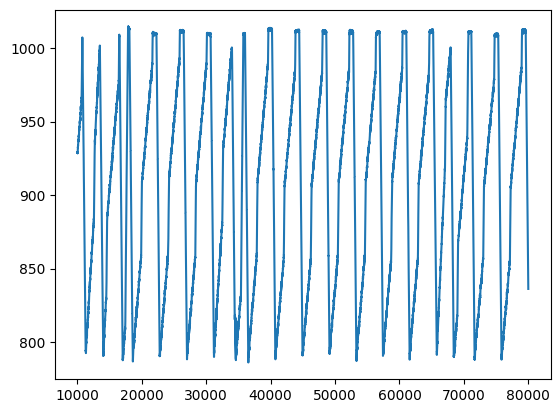

In [67]:
plt.plot(normal_df['LIT301'][10000:80000])